In [1]:
import sys
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
mnist_train = torch.utils.data.Subset(
    datasets.MNIST(root='./data', download=True, train=True, transform=ToTensor()),
    list(range(1000))
)
mnist_test = datasets.MNIST(root='./data', download=True, train=False, transform=ToTensor())

train_dataloader = DataLoader(mnist_train, batch_size=32, shuffle=True)
test_dataloader  = DataLoader(mnist_test,  batch_size=32, shuffle=True)

[2.0995687283575535, 1.1167545150965452, 0.572669611312449, 0.40920617152005434, 0.29826259426772594, 0.2749592752661556, 0.1941743555944413, 0.14010489534121007, 0.10487138875760138, 0.08739316242281348]
[1.584626996098235, 0.8698788880349729, 0.6101558441266465, 0.5037911752828013, 0.5460845629056803, 0.4594060213040239, 0.5035063101413151, 0.4667118707308754, 0.5172726071347444, 0.48767897464073123]


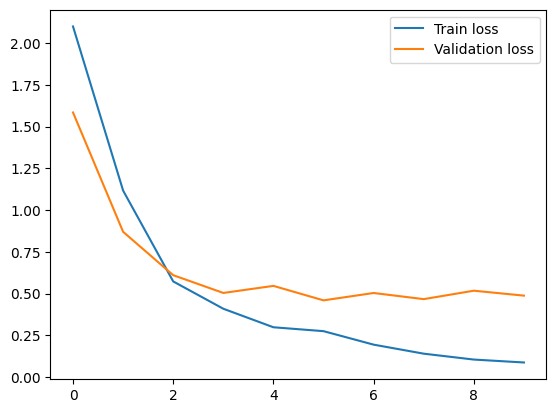

In [2]:
import matplotlib.pyplot as plt

model = nn.Sequential(
    nn.Linear(784, 500),
    nn.ReLU(),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []
for i in range(0, 10):
    model.train()
    loss_sum = 0
    for X, y in train_dataloader:
        X = X.reshape((-1, 784))
        y = F.one_hot(y, num_classes=10).type(torch.float32)

        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
    train_losses.append(loss_sum / len(train_dataloader))

    val_loss_sum = 0
    model.eval()
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.reshape((-1, 784))
            y = F.one_hot(y, num_classes=10).type(torch.float32)
            outputs = model(X)
            loss = loss_fn(outputs, y)
            val_loss_sum += loss.item()
    val_losses.append(val_loss_sum / len(test_dataloader))

# Print the loss lists to inspect values
print(train_losses)
print(val_losses)

# Plot train_losses with label "Train loss"
plt.plot(train_losses, label="Train loss")

# Plot val_losses with label "Validation loss"
plt.plot(val_losses, label="Validation loss")

# Add legend and show the plot
plt.legend()
plt.show()